In [1]:
##!/usr/bin/python -tt 
# -*- coding: utf-8 -*-

import os
#from os.path import join
#import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

import errno
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score

from collections import Counter
#from keras.callbacks import CSVLogger
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

#from keras.utils.vis_utils import plot_model
from matplotlib.backends.backend_pdf import PdfPages
from contextlib import redirect_stdout

c:\users\rchamchong\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def generate_code(path):
#    os.chdir(path)
    letters = ''

    for root, dirs, files in os.walk('.', topdown = False):
        if len(dirs)>0:
            print(dirs)
            for d in dirs:
                path1=path+'/'+d+'/*.txt'
#                path1=os.path.join(path,d)
                print(path1)
                fi = glob.glob(path1)
#                print(fi)
                for name in fi :
#                    print(name)
                    with open(name,'r',encoding='utf-8') as f1:
                        transcript = f1.read()
                        letters += transcript
#    print(letters)            
    return Counter(letters) #this function 

path='C:/Python-DL/Numeric/'
c_train=generate_code(path)
print(c_train)
letters_train = set(c_train.keys())
print(letters_train)
letters=sorted(list(letters_train))
print(letters)
print('Letters:', ' '.join(letters))

print(letters)
num_classes=len(letters)

print('A number of classes=',num_classes)

['b๐', 'b๑', 'b๒', 'b๓', 'b๔', 'b๕', 'b๖', 'b๗', 'b๘', 'b๙']
C:/Python-DL/Numeric//b๐/*.txt
C:/Python-DL/Numeric//b๑/*.txt
C:/Python-DL/Numeric//b๒/*.txt
C:/Python-DL/Numeric//b๓/*.txt
C:/Python-DL/Numeric//b๔/*.txt
C:/Python-DL/Numeric//b๕/*.txt
C:/Python-DL/Numeric//b๖/*.txt
C:/Python-DL/Numeric//b๗/*.txt
C:/Python-DL/Numeric//b๘/*.txt
C:/Python-DL/Numeric//b๙/*.txt
['.ipynb_checkpoints', 'Numeric', 'Result']
C:/Python-DL/Numeric//.ipynb_checkpoints/*.txt
C:/Python-DL/Numeric//Numeric/*.txt
C:/Python-DL/Numeric//Result/*.txt
Counter({'๘': 56, '๙': 56, '๕': 56, '๗': 56, '๓': 56, '๖': 56, '๐': 56, '๑': 56, '๒': 56, '๔': 56})
{'๙', '๑', '๘', '๒', '๐', '๕', '๗', '๓', '๖', '๔'}
['๐', '๑', '๒', '๓', '๔', '๕', '๖', '๗', '๘', '๙']
Letters: ๐ ๑ ๒ ๓ ๔ ๕ ๖ ๗ ๘ ๙
['๐', '๑', '๒', '๓', '๔', '๕', '๖', '๗', '๘', '๙']
A number of classes= 10


please wait processing...
C:/Python-DL/Numeric//.ipynb_checkpoints/*.png
C:/Python-DL/Numeric//Numeric/*.png
C:/Python-DL/Numeric//Result/*.png
C:/Python-DL/Numeric//b๐/*.png
Filename:a005_208.png
Label: ๐



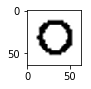

Filename:a015_112.png
Label: ๐



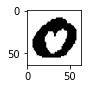

Filename:a025_317.png
Label: ๐



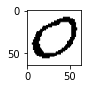

C:/Python-DL/Numeric//b๑/*.png
Filename:a005_69.png
Label: ๑



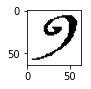

Filename:a010_299.png
Label: ๑



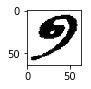

Filename:a015_98.png
Label: ๑



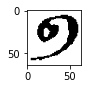

C:/Python-DL/Numeric//b๒/*.png
Filename:a005_50.png
Label: ๒



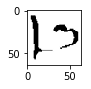

Filename:a010_211.png
Label: ๒



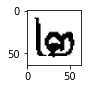

Filename:a015_267.png
Label: ๒



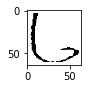

C:/Python-DL/Numeric//b๓/*.png
Filename:a005_361.png
Label: ๓



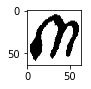

Filename:a015_66.png
Label: ๓



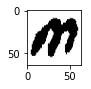

Filename:a040_9.png
Label: ๓



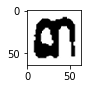

C:/Python-DL/Numeric//b๔/*.png
Filename:a005_253.png
Label: ๔



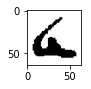

Filename:a005_400.png
Label: ๔



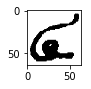

Filename:a010_127.png
Label: ๔



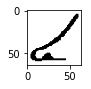

C:/Python-DL/Numeric//b๕/*.png
Filename:a005_109.png
Label: ๕



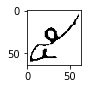

Filename:a010_217.png
Label: ๕



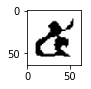

Filename:a015_355.png
Label: ๕



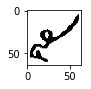

C:/Python-DL/Numeric//b๖/*.png
Filename:a010_150.png
Label: ๖



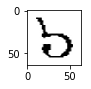

Filename:a010_56.png
Label: ๖



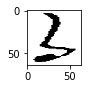

Filename:a015_230.png
Label: ๖



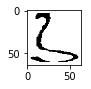

C:/Python-DL/Numeric//b๗/*.png
Filename:a005_432.png
Label: ๗



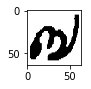

Filename:a010_258.png
Label: ๗



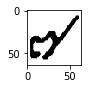

Filename:a015_354.png
Label: ๗



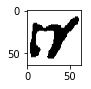

C:/Python-DL/Numeric//b๘/*.png
Filename:a005_401.png
Label: ๘



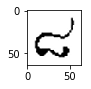

Filename:a010_123.png
Label: ๘



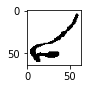

Filename:a010_262.png
Label: ๘



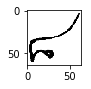

C:/Python-DL/Numeric//b๙/*.png
Filename:a005_502.png
Label: ๙



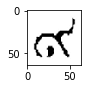

Filename:a005_54.png
Label: ๙



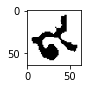

Filename:a025_92.png
Label: ๙



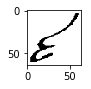

560


In [3]:
def loadImageFolder(path,H,W,cl_name): 
    print('please wait processing...')
    data=[]
    label=[]
    for root, dirs, files in os.walk("."):
#        data=np.zeros((filesize,H,W), np.uint
#        label=np.zeros((filesize), np.uint)
        if len(dirs)>0:
            for d in dirs:
                path1=path+'/'+d+'/*.png'
                print(path1)
                fi = glob.glob(path1)

                for i,name in enumerate(fi):
                    try:
                        pathIn, finame = os.path.split(name) #pathIn = pathfile, finame=file.xxx
                        fname=os.path.splitext(finame)[0] #fi=filename without .xxx
                        n=np.fromfile(name,np.uint8)
#                       img = cv2.imread(name,0) # read image file , 0=Grayscale
                        img=cv2.imdecode(n,0)
                        resized_img=cv2.resize(img,(H,W),interpolation=cv2.INTER_CUBIC)
                        img = resized_img.astype(np.float32)
                        img /= 255.0
                        data.append(np.asarray(img))
                        fileGT=pathIn+'/'+fname+'.gt.txt'

                        with open(fileGT, "r", encoding="utf-8") as f1:
                            txt=f1.read()
                            label.append(txt)
#                            label.append(np.uint(cl_name.index(f1.read())))
                    
                        if i<3:
                            plt.figure(figsize=(1, 1))
                            plt.imshow(img, cmap='gray')
                            print('Filename:%s\nLabel: %s\n' % (finame, txt))
                            plt.show()
                            
                    except IOError as exc: #Not sure what error this is
                        if exc.errno != errno.EISDIR:
                            raise

    return data, label

# input image dimensions
img_rows, img_cols = 64, 64
data,label=loadImageFolder(path, img_cols, img_rows, letters)
print(len(label))

In [4]:
def generateEvaluationGraph(history,i):
    # Loss curves
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))    
    f.suptitle('Fold: '+str(i),fontsize=18)
    ax1.plot(history.history['loss'],'r',linewidth=3.0)
    ax1.plot(history.history['val_loss'],'b',linewidth=3.0)
    ax1.legend(['Training set', 'Validation set'],fontsize=16)
    ax1.set_xlabel('Epochs ',fontsize=16)
    ax1.set_ylabel('Loss',fontsize=16)
    ax1.set_title('Loss Curves',fontsize=16)
 
    # Accuracy Curves
    ax2.plot(history.history['acc'],'r',linewidth=3.0)
    ax2.plot(history.history['val_acc'],'b',linewidth=3.0)
    ax2.legend(['Training set', 'Validation set'],fontsize=16)
    ax2.set_xlabel('Epochs ',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=16)
    ax2.set_title('Accuracy Curves',fontsize=16)
    return f
###================== creat Basic CNN
def creatModel(model,input_shape):  
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

    model.add(Conv2D(64, (3, 3), activation='relu') )
    model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

    #model.add(Dropout(0.25))
    # fully connected dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    return model

###=========================== main
xdata_train, x_test, ydata_train, y_test = train_test_split(data, label, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(xdata_train, ydata_train, test_size=0.2)

print(len(x_train))
print('please wait processing...')
x_train=np.asarray(x_train)
x_valid=np.asarray(x_valid)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_valid=np.asarray(y_valid)
y_test=np.asarray(y_test)
print(x_train.shape)
print(y_test)

358
please wait processing...
(358, 64, 64)
['๙' '๕' '๐' '๗' '๓' '๖' '๐' '๕' '๗' '๔' '๘' '๐' '๑' '๙' '๖' '๓' '๑' '๗'
 '๓' '๘' '๕' '๗' '๓' '๔' '๐' '๕' '๕' '๘' '๒' '๒' '๔' '๖' '๘' '๐' '๗' '๔'
 '๕' '๔' '๕' '๐' '๐' '๔' '๑' '๘' '๑' '๔' '๖' '๖' '๙' '๒' '๗' '๑' '๗' '๖'
 '๗' '๕' '๐' '๙' '๐' '๐' '๑' '๑' '๐' '๔' '๒' '๕' '๙' '๘' '๙' '๐' '๖' '๓'
 '๗' '๓' '๒' '๐' '๑' '๖' '๗' '๖' '๔' '๒' '๔' '๐' '๒' '๐' '๒' '๘' '๓' '๘'
 '๐' '๘' '๗' '๒' '๓' '๗' '๒' '๑' '๕' '๗' '๕' '๐' '๕' '๐' '๓' '๗' '๖' '๗'
 '๔' '๙' '๖' '๙']


In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
print(x_train.shape)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)
y_test = keras.utils.to_categorical(y_test)
print(y_test)

print(y_test.shape)

(358, 64, 64, 1)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(112, 10)


In [6]:

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
### start session
session_config = K.tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)    
# please do not use the totality of the GPU memory
session_config.gpu_options.per_process_gpu_memory_fraction = 0.90

### create model
model = Sequential()
model = creatModel(model,input_shape)
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])
model.summary()
newpath='C:/Python-DL/Result/'
if not os.path.exists(newpath):
    os.makedirs(newpath)
#stop_here = EarlyStopping(monitor='val_loss',patience=5,verbose=0)
#plot_model(model, to_file=newpath+'model_plot.png', show_shapes=True, show_layer_names=True)
with open(newpath+'model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

fi=open(newpath+'evaluation.txt','w')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

(358, 10)
Train on 358 samples, validate on 90 samples
Epoch 1/10
358/358 [==============================] - 4s - loss: 1.9474 - acc: 0.3324 - val_loss: 0.9243 - val_acc: 0.7222
Epoch 2/10
358/358 [==============================] - 3s - loss: 0.7641 - acc: 0.7346 - val_loss: 0.7091 - val_acc: 0.6889
Epoch 3/10
358/358 [==============================] - 3s - loss: 0.4685 - acc: 0.8212 - val_loss: 0.5993 - val_acc: 0.7778
Epoch 4/10
358/358 [==============================] - 3s - loss: 0.3100 - acc: 0.8883 - val_loss: 0.4403 - val_acc: 0.8000
Epoch 5/10
358/358 [==============================] - 3s - loss: 0.2151 - acc: 0.9190 - val_loss: 0.4372 - val_acc: 0.8444
Epoch 6/10
358/358 [==============================] - 3s - loss: 0.1171 - acc: 0.9665 - val_loss: 0.4167 - val_acc: 0.8778
Epoch 7/10
358/358 [==============================] - 3s - loss: 0.1044 - acc: 0.9665 - val_loss: 0.3420 - val_acc: 0.8778
Epoch 8/10
358/358 [==============================] - 3s - loss: 0.0662 - acc: 0.980

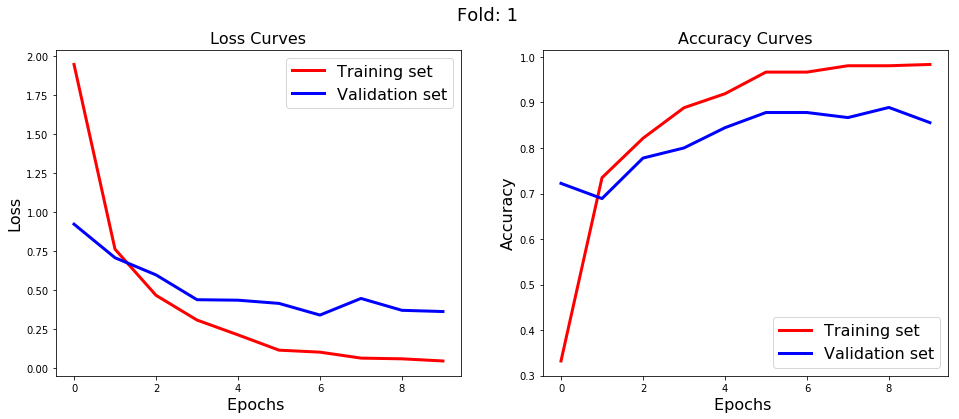

In [7]:
epochs = 10
# in 1 epoch = number of training examples/batch_size
batch_size =16 #3008, 2048 check with the number of train instances
start=time.time()
print(y_train.shape)
# Fit the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,epochs=epochs, verbose=1,
                  validation_data=(x_valid, y_valid))
print("training....")
done = time.time()
elapsed = done - start
print(time.strftime("ETA of each round=%H:%M:%S\n", time.gmtime(elapsed)))
# serialize weights to HDF5
model.save(newpath+'model01.h5')
print("Saved model01.h5 to disk")

# evaluate the model
y_pred = model.predict(x_test)
 
score = model.evaluate(x_valid, y_valid, verbose=1)
loss=score[0]*100
ac=score[1]*100
print("\n%s: %.2f%%\t%s: %.2f%%" % (model.metrics_names[0], loss, model.metrics_names[1], ac))
 
y_true = np.argmax(y_test,axis=1)
y_pr = np.argmax(y_pred,axis=1)

# Precision
pr=precision_score(y_true, y_pr, average="macro")*100
print("Precision: %.2f%%" % pr)

# Recall
rc=recall_score(y_true, y_pr, average="macro")*100
print("Recall: %.2f%%" % rc)

# F1 score
f1=f1_score(y_true, y_pr, average="macro")*100
print("F1: %.2f%%" % f1)

# Cohen's kappa
kp=cohen_kappa_score(y_true, y_pr)*100
print("Cohen_kappa_score: %.2f%%" % kp)

### Confusion matrix
#    cf=confusion_matrix(y_true, y_pr, range(0,num_classes-1) )
#    np.set_printoptions(precision=2)

#    plt.figure()
#    fig1 = plt.gcf()
#    fig1.set_size_inches(32, 32)
#    plot_confusion_matrix(cf, classes=class_names,
#                      title='Confusion matrix, without normalization',
#                      cmap=plt.cm.cool)
#    try:
#        with PdfPages(newpath+'confuse%d.pdf'%i) as pdf1:
#            pdf.savefig(fig1)
#    except ValueError:
#        print('error save confuse%d.pdf'%i)


fig=generateEvaluationGraph(history,1)
